In [1]:
import numpy as np
import pandas as pd


In [2]:
!pip install tensorflow keras

In [25]:
from ast import increment_lineno
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from keras.models import Sequential,Model
from keras.layers import Conv2D,MaxPooling2D,GlobalAveragePooling2D
from keras.layers import Activation,Dropout,BatchNormalization,Flatten,Dense,AvgPool2D,MaxPool2D
from keras.optimizers import Adam,SGD,RMSprop
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping


import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import glob
import matplotlib.image as mpimg

import plotly.offline as py
import plotly.express as px
import prophet
from prophet.plot import plot_plotly,add_changepoints_to_plot

In [26]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"prakrithics","key":"ed637ad24594863b132531ce7b077a0b"}'}

In [27]:
import zipfile
os.makedirs("/root/.kaggle",exist_ok=True)

In [28]:
!mv kaggle.json /root/.kaggle

In [7]:
!chmod 600 /root/.kaggle/kaggle.json

In [29]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
chest-xray-pneumonia.zip: Skipping, found more recently modified local copy (use --force to force download)


In [30]:
!unzip chest-xray-pneumonia.zip -d chest_xray_data


Streaming output truncated to the last 5000 lines.
  inflating: chest_xray_data/chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray_data/chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray_data/chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray_data/chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray_data/chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray_data/chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray_data/chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray_data/chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray_data/chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray_data/chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray_data/chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray_data/chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray_data/chest_xray/train/NO

In [31]:
data='/content/chest_xray_data/chest_xray/'

In [32]:
os.listdir(data)

['__MACOSX', 'test', 'train', 'val', 'chest_xray']

In [33]:
!rm -r /content/chest_xray_data/chest_xray/__MACOSX
!rm -r /content/chest_xray_data/chest_xray/chest_xray/test
!rm -r /content/chest_xray_data/chest_xray/chest_xray/train
!rm -r /content/chest_xray_data/chest_xray/chest_xray/val
!rm -r /content/chest_xray_data/chest_xray/chest_xray

In [36]:
data_dir="/content/chest_xray_data/chest_xray/train"
train_dataset=tf.keras.utils.image_dataset_from_directory(
    data_dir,
    image_size=(150,150),
    batch_size=16
)

Found 5216 files belonging to 2 classes.


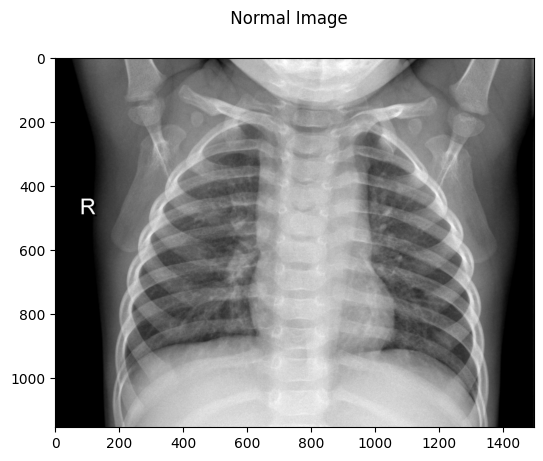

In [37]:
normal_images=[]
for img_path in glob.glob(data+'train/NORMAL/*'):
  normal_images.append(mpimg.imread(img_path))

fig=plt.figure()
fig.suptitle(' Normal Image')
plt.imshow(normal_images[0],cmap='gray')

In [38]:
Image_width=150
Image_Height=150
Channels=3

INPUT_SHAPE=(Image_width,Image_Height,Channels)
NB_CLASSES=2
EPOCHS=30
BATCH_SIZE=6;

In [40]:
model = Sequential()

# First Convolutional Block
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=INPUT_SHAPE,
                 kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Block
model.add(Conv2D(64, (3, 3), activation='relu',
                 kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
# Optional: model.add(Dropout(0.25))

# Third Convolutional Block
model.add(Conv2D(128, (3, 3), activation='relu',
                 kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
# Optional: model.add(Dropout(0.25))

model.add(Flatten())

# Fully Connected Layers
model.add(Dense(128, activation='relu',
                kernel_regularizer=regularizers.l2(0.001))) # Added L2 regularization
model.add(Dropout(0.7))

# Output layer for binary classification
model.add(Dense(1, activation='sigmoid'))

In [41]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [42]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 148, 148, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 72, 72, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 34, 34, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,829,377 (18.42 MB)

 Trainable params: 4,828,929 (18.42 MB)

 Non-trainable params: 448 (1.75 KB)

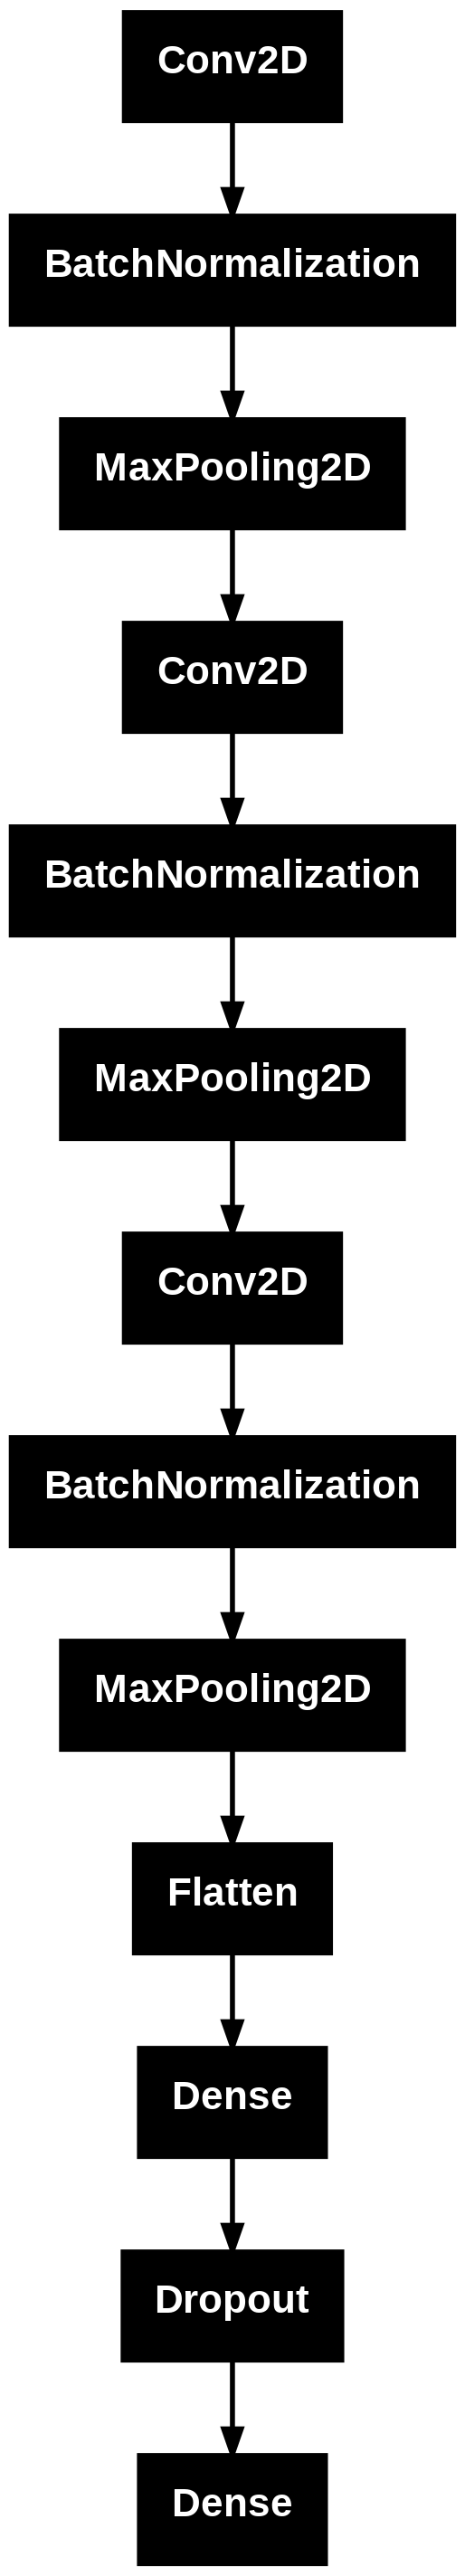

In [43]:
from tensorflow.keras.utils import plot_model
plot_model(model,to_file='model.png')

In [44]:
train_dir = "/content/chest_xray_data/chest_xray/train"
val_dir = "/content/chest_xray_data/chest_xray/val"
test_dir = "/content/chest_xray_data/chest_xray/test"

In [45]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(150, 150),
    batch_size=16,
    label_mode='binary'  # use 'categorical' only if you want one-hot vectors
)

val_dataset = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    image_size=(150, 150),
    batch_size=16,
    label_mode='binary'
)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(150, 150),
    batch_size=16,
    label_mode='binary'
)

Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


In [46]:
train_image_count= 5216
val_image_count= 16

steps_per_epoch= train_image_count//BATCH_SIZE
validation_steps= val_image_count//BATCH_SIZE

In [47]:
early_stoping=EarlyStopping(monitor='val_loss',
                            patience=10,
                            restore_best_weights=True,
                            verbose=1)

In [48]:
history=model.fit(
    train_dataset,
    epochs=EPOCHS,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_dataset,
    validation_steps=validation_steps
)

Epoch 1/30
326/869 ━━━━━━━━━━━━━━━━━━━━ 47s 88ms/step - accuracy: 0.8422 - loss: 1.3833

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning:

Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.



869/869 ━━━━━━━━━━━━━━━━━━━━ 36s 34ms/step - accuracy: 0.8598 - loss: 1.0998 - val_accuracy: 0.5000 - val_loss: 5.3011
Epoch 2/30
869/869 ━━━━━━━━━━━━━━━━━━━━ 39s 36ms/step - accuracy: 0.9222 - loss: 0.6695 - val_accuracy: 1.0000 - val_loss: 0.7056
Epoch 3/30
869/869 ━━━━━━━━━━━━━━━━━━━━ 34s 39ms/step - accuracy: 0.9304 - loss: 0.5984 - val_accuracy: 0.8750 - val_loss: 0.6267
Epoch 4/30
869/869 ━━━━━━━━━━━━━━━━━━━━ 40s 38ms/step - accuracy: 0.9375 - loss: 0.5324 - val_accuracy: 0.6875 - val_loss: 1.4645
Epoch 5/30
869/869 ━━━━━━━━━━━━━━━━━━━━ 34s 39ms/step - accuracy: 0.9446 - loss: 0.4881 - val_accuracy: 0.8750 - val_loss: 0.6909
Epoch 6/30
869/869 ━━━━━━━━━━━━━━━━━━━━ 36s 41ms/step - accuracy: 0.9450 - loss: 0.4946 - val_accuracy: 0.5625 - val_loss: 7.2483
Epoch 7/30
869/869 ━━━━━━━━━━━━━━━━━━━━ 35s 34ms/step - accuracy: 0.9454 - loss: 0.5257 - val_accuracy: 0.8750 - val_loss: 0.7274
Epoch 8/30
869/869 ━━━━━━━━━━━━━━━━━━━━ 42s 34ms/step - accuracy: 0.9419 - loss: 0.6964 - val_accurac

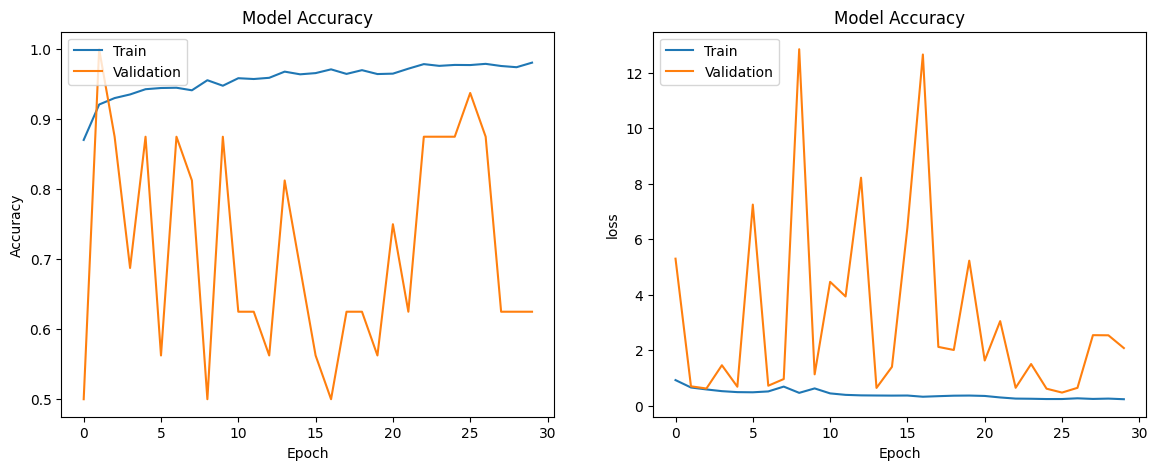

In [49]:
fig, ax=plt.subplots(1,2, figsize=(14,5))
ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Model Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Model Accuracy')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

In [50]:
print("training_accuracy",history.history['accuracy'][-1])

training_accuracy 0.9808282256126404


In [51]:
print("validation loss",history.history['val_loss'][-1])

validation loss 2.082385540008545


In [54]:
class_names=val_dataset.class_names
print(class_names)  #['NORMAL','PNEUMONIC']


['NORMAL', 'PNEUMONIA']


In [55]:
true_labels=[]
for images,labels in val_dataset:
  true_labels.extend(labels.numpy())
true_labels=np.array(true_labels)

In [57]:
predictions=model.predict(val_dataset)
#predicted_classes=np.argmax(predictions,axis=1) #only for softmax output
#OR if its binary classification with sigmoid output:
predicted_classes=(predictions>0.5).astype("int32").flatten()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step


In [61]:
predicted_labels=[class_names[i] for i in predicted_classes]
true_labels_names=[class_names[int (i)]for i in true_labels]

/tmp/ipython-input-2526240157.py:2: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



In [62]:
print(predicted_labels[:10])
print(predicted_classes[:10])

['PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'PNEUMONIA']
[1 1 1 1 1 1 1 0 1 1]


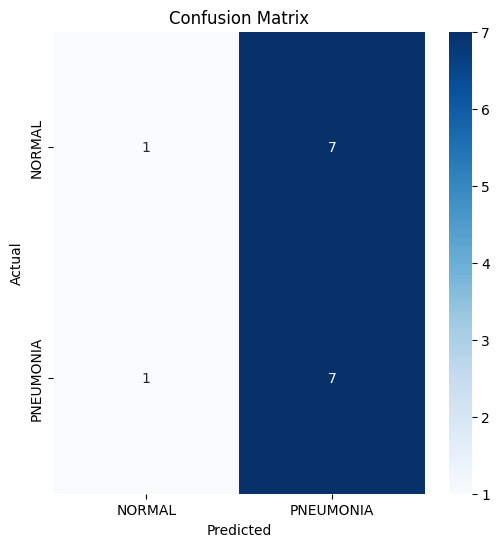

In [63]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(6,6))

cf=confusion_matrix(true_labels_names, predicted_labels)
sns.heatmap(cf,
            cmap="Blues",
            linecolor='black',
            annot=True,
            fmt='',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [64]:
pred_class=np.array(predicted_labels)

In [65]:
label_map={'NORMAL':0,'PNEUMONIA':1}

pred_class=np.array([label_map[label] for label in predicted_labels])
true_class=np.array([int(label) for label in true_labels])

/tmp/ipython-input-2110430505.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



In [68]:
correct=np.nonzero(pred_class==true_class)[0]
correct=np.nonzero(pred_class==true_class)[0]
accuracy=len(correct)/len(true_class)
print(f"Accuracy from comparison:{accuracy:.4f}")

Accuracy from comparison:0.5000


In [69]:
#first convert the validation dataset to a list of (image,label) pairs
val_images=[]
val_labels=[]

for img, label in val_dataset.unbatch().take(100):
  val_images.append(img.numpy())
  val_labels.append(label.numpy())

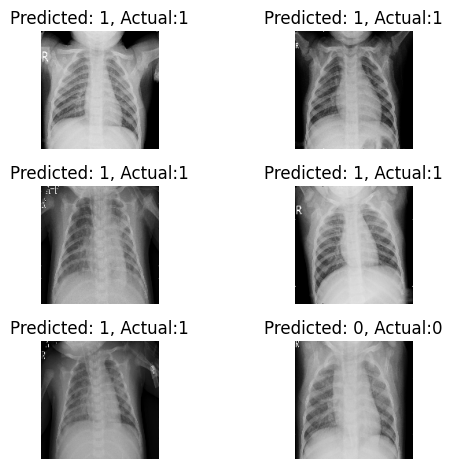

In [71]:
i=0
for c in correct[:6]:
  plt.subplot(3,2,i+1)
  plt.imshow(val_images[c].astype("uint8"))
  plt.title("Predicted: {}, Actual:{}".format(pred_class[c], true_class[c]))
  plt.axis('off')
  i+=1

plt.tight_layout()
plt.show()